In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install Pyspark

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=77b54a32a3a842023bf8e9d22608928be25911103f2f0599449b0c5ac89ee9a7
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


## Set up the environment for SparkSession and SparkContext

In [ ]:
from pyspark import SparkContext

In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName("PySpark1").getOrCreate()

# Get the SparkContext from the SparkSession
sc = spark.sparkContext

In [ ]:
# Spark version
sc.version

'3.5.0'

In [ ]:
# PySpark version
sc.pythonVer

'3.10'

In [ ]:
# Master location
sc.master

'local[*]'

Currently, the SparkSession is running in local (it can be either **Local** or Cluster)

#### Create a dataframe using CSV/JSON/TXT file

In [ ]:
file_path = '/content/drive/My Drive/Research Data/Insect_PT.csv'
insect_df = spark.read.csv(file_path, header=True, inferSchema=True)

In [ ]:
insect_df.printSchema()

root
 |-- insectID: integer (nullable = true)
 |-- insect_name: string (nullable = true)
 |-- price: integer (nullable = true)
 |-- crown: integer (nullable = true)
 |-- location: string (nullable = true)
 |-- date_caught: string (nullable = true)
 |-- pole: string (nullable = true)



In [ ]:
insect_df.take(6)

[Row(insectID=1, insect_name='nhen thay ma', price=30, crown=None, location='plaza', date_caught='10/17/2023 12:12', pole='DARK'),
 Row(insectID=2, insect_name='buom trang', price=68, crown=None, location='plaza', date_caught='10/17/2023 12:12', pole='DARK'),
 Row(insectID=3, insect_name='hop tien sao', price=100, crown=None, location='camp', date_caught='10/17/2023 14:42', pole='DARK'),
 Row(insectID=4, insect_name='bo hung thay ma', price=62, crown=None, location='camp', date_caught='10/17/2023 14:48', pole='DARK'),
 Row(insectID=5, insect_name='ran', price=20, crown=None, location='camp', date_caught='10/17/2023 14:48', pole='DARK'),
 Row(insectID=6, insect_name='buom vang', price=51, crown=1, location='camp', date_caught='10/17/2023 14:49', pole='DARK')]

## Data Visualization

### Simple visualization Pyspark

#### Install **pyspark-dist-explore** - a chart visualization library for Spark

In [ ]:
!pip install pyspark-dist-explore
from pyspark_dist_explore import Histogram, hist

#### hist() - histogram

In [ ]:
insect_df_price = insect_df.select('price')


TypeError: ignored

NameError: ignored

#### toPandas() – convert **spark** dataframe to **pandas** dataframe

In [ ]:
# Spark DataFrame format
insect_df.show()

+--------+--------------------+-----+-----+--------+----------------+----+
|insectID|         insect_name|price|crown|location|     date_caught|pole|
+--------+--------------------+-----+-----+--------+----------------+----+
|       1|        nhen thay ma|   30| NULL|   plaza|10/17/2023 12:12|DARK|
|       2|          buom trang|   68| NULL|   plaza|10/17/2023 12:12|DARK|
|       3|        hop tien sao|  100| NULL|    camp|10/17/2023 14:42|DARK|
|       4|     bo hung thay ma|   62| NULL|    camp|10/17/2023 14:48|DARK|
|       5|                 ran|   20| NULL|    camp|10/17/2023 14:48|DARK|
|       6|           buom vang|   51|    1|    camp|10/17/2023 14:49|DARK|
|       7|           buom vang|   26| NULL|    camp|10/17/2023 14:49|DARK|
|       8|              ve sau|   64| NULL|    camp|10/17/2023 14:49|DARK|
|       9|chuon chuon duoi ...|   60| NULL|    camp|10/17/2023 14:49|DARK|
|      10|          buom trang|   69| NULL|    camp|10/17/2023 14:49|DARK|
|      11|          ve sa

In [ ]:
# Pandas DataFrame format
insect_pandas = insect_df.toPandas()
insect_pandas

,insectID,insect_name,price,crown,location,date_caught,pole
0,1,nhen thay ma,30,NaN,plaza,10/17/2023 12:12,DARK
1,2,buom trang,68,NaN,plaza,10/17/2023 12:12,DARK
2,3,hop tien sao,100,NaN,camp,10/17/2023 14:42,DARK
3,4,bo hung thay ma,62,NaN,camp,10/17/2023 14:48,DARK
4,5,ran,20,NaN,camp,10/17/2023 14:48,DARK
...,...,...,...,...,...,...,...
4480,4482,de,63,NaN,camp,11/27/2023 19:25,None
4481,4483,buom trang,127,1.0,camp,11/27/2023 19:26,None
4482,4484,buom vua cam lon,125,1.0,camp,11/27/2023 19:26,None
4483,4485,oc sen,28,NaN,camp,11/27/2023 19:26,None


array([[<Axes: title={'center': 'price'}>]], dtype=object)

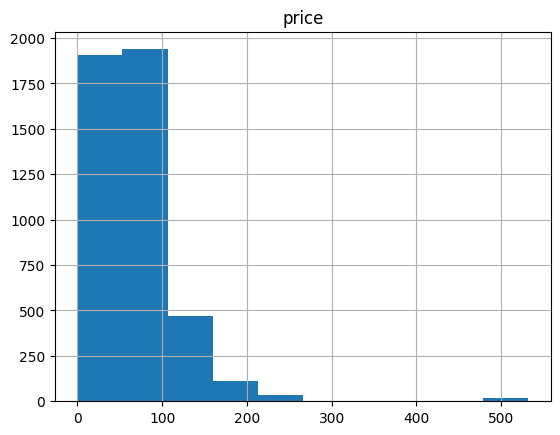

In [ ]:
insect_pandas.hist('price')

####toHandy() - HandySpark

In [ ]:
!pip install handyspark

In [ ]:
from handyspark import *

In [ ]:
insect_handy = insect_df.toHandy()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


<Axes: title={'center': 'price'}, xlabel='price'>

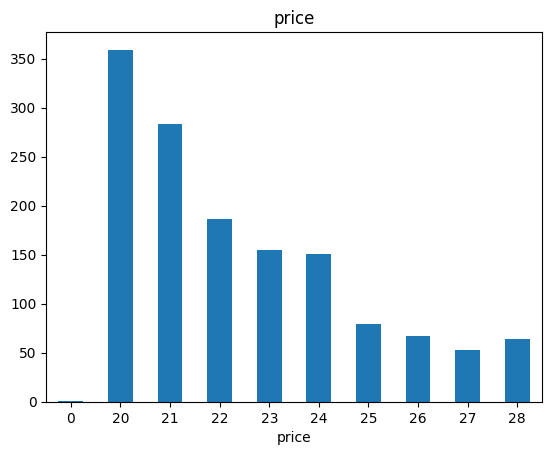

In [ ]:
insect_handy.cols['price'].hist()